In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from google.colab import files
import time

%matplotlib inline

In [ ]:
# def getGroups(records, groupBy):
#   grouped = records.groupby(groupBy, as_index=False).sum().sort_values(by=['count'], ascending = False)
#   grouped['percentage'] = grouped['count'] / grouped['count'].sum()*100
#   return grouped

In [ ]:
# def getCategoriesCount(groups, threshold, groupBy):
#   groupCategories = groups[groups['count'] > threshold]
#   otherGroups = groups[groups['count'] <= threshold]
#   other = {groupBy: 'other', 'count': otherGroups['count'].sum(), 'percentage': otherGroups['percentage'].sum()}

#   groupCategories = groupCategories.append(other, ignore_index = True)
#   count = groupCategories['count']
#   categories = groupCategories[groupBy]

#   return categories, count

In [ ]:
# ref: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
def showChart(title, categories, count):
  chartSide = 1 * math.sqrt(sum(count))
  chartSize = (chartSide, chartSide)
  colors = sns.color_palette('husl', len(categories) + 1)

  fig1, ax1 = plt.subplots(figsize=chartSize)
  piechart = ax1.pie(count, colors = colors, autopct='%.0f%%', startangle=89)

  wedges, texts, autotexts = piechart

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      ax1.annotate(categories[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                  horizontalalignment=horizontalalignment, **kw)
  ax1.set_title(title)
  plt.show()

In [ ]:
# ref: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
def downloadChart(country, title, categories, count):
  chartSide = 1 * math.sqrt(sum(count))
  chartSize = (chartSide, chartSide)
  colors = sns.color_palette('husl', len(categories) + 1)

  fig1, ax1 = plt.subplots(figsize=chartSize)
  piechart = ax1.pie(count, colors = colors, autopct='%.0f%%', startangle=89)

  wedges, texts, autotexts = piechart

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      ax1.annotate(categories[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                  horizontalalignment=horizontalalignment, **kw)
  ax1.set_title(title)
  imageTitle = f"{country}_{title}.png"
  plt.savefig(imageTitle)
  files.download(imageTitle)

## Attacked country - attack organisation

In [ ]:
def getAttackedCountryCharts(country):
  

  records = df.loc[df['attacked_country'] == country]
  organisations = records.attacking_organisation.unique()


  for organisation in organisations:
    organisationAttacks = records.loc[records['attacking_organisation'] == organisation].reset_index().sort_values(by=['count'], ascending = False)
    
    country = organisationAttacks['attacking_country'][0]
    categories = organisationAttacks['attack_type']
    count = organisationAttacks['count']
    # title = organisation + " (" + str(sum(count)) + ")"
    title = f"{country}_{organisation} ({str(sum(count))})"
    
    showChart(title, categories, count)
    # downloadChart(country, title, categories, count)

In [ ]:
df = pd.read_csv('piechart.csv')

print(df.head())

attackedCountries = df['attacked_country'].unique()

print(attackedCountries)

  attacking_country attacking_organisation attack_type attacked_country  count
0            Russia                KillNet  Defacement        Anonymous      1
1     Decentralised              Anonymous     Unknown          Belarus      1
2           Ukraine          RIAEvangelist       Wiper          Belarus      1
3            Russia       Anonymous Russia        DDoS          Belarus      2
4            Russia                UNC1151    Phishing          Belarus      1
['Anonymous' 'Belarus' 'Belgium' 'Bulgaria' 'Canada' 'Colombia' 'Croatia'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany'
 'Hungary' 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Latvia' 'Lithuania'
 'Moldova' 'Montenegro' 'Norway' 'Poland' 'Romania' 'Russian Federation'
 'Slovakia' 'Spain' 'Sweden' 'Switzerland' 'Ukraine' 'United Kingdom'
 'United States']


### Anonymous

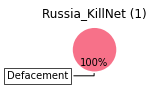

In [ ]:
getAttackedCountryCharts('Anonymous')

### Belarus

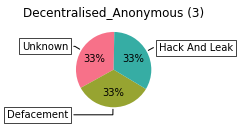

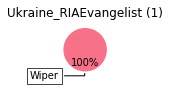

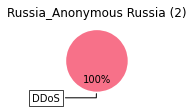

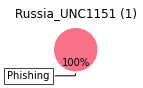

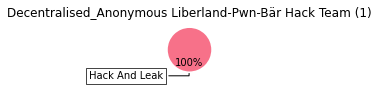

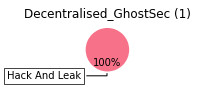

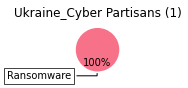

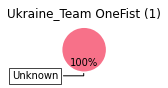

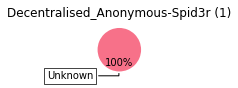

In [ ]:
getAttackedCountryCharts('Belarus')

### Bulgaria

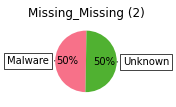

In [ ]:
getAttackedCountryCharts('Bulgaria')

### Canada

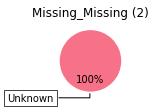

In [ ]:
getAttackedCountryCharts('Canada')

### Colombia

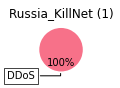

In [ ]:
getAttackedCountryCharts('Colombia')

### Croatia

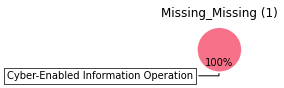

In [ ]:
getAttackedCountryCharts('Croatia')

### Czech Republic

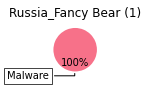

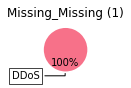

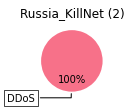

In [ ]:
getAttackedCountryCharts('Czech Republic')

### Denmark

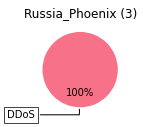

In [ ]:
getAttackedCountryCharts('Denmark')

### Estonia

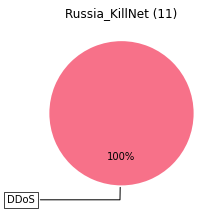

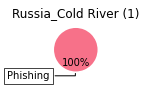

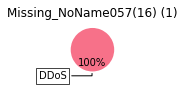

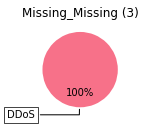

In [ ]:
getAttackedCountryCharts('Estonia')

### Finland

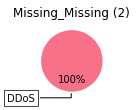

In [ ]:
getAttackedCountryCharts('Finland')

### France

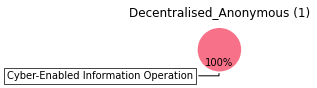

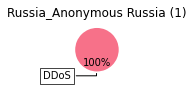

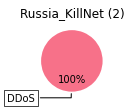

In [ ]:
getAttackedCountryCharts('France')

### Germany

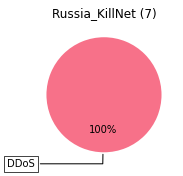

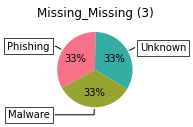

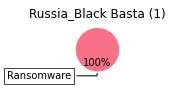

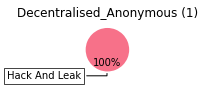

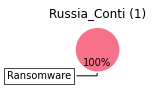

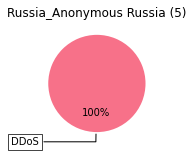

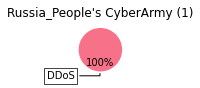

In [ ]:
getAttackedCountryCharts('Germany')

### Hungary

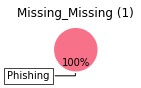

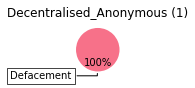

In [ ]:
getAttackedCountryCharts('Hungary')

### Israel

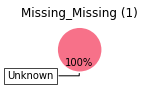

In [ ]:
getAttackedCountryCharts('Israel')

### Italy

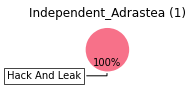

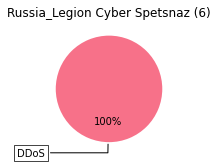

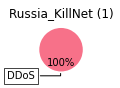

In [ ]:
getAttackedCountryCharts('Italy')

### Japan

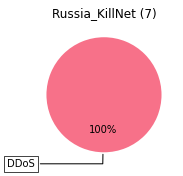

In [ ]:
getAttackedCountryCharts('Japan')

### Kazakhstan

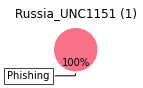

In [ ]:
getAttackedCountryCharts('Kazakhstan')

### Latvia

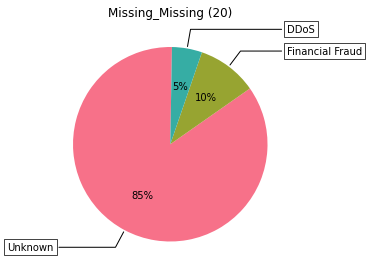

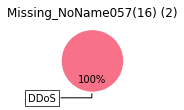

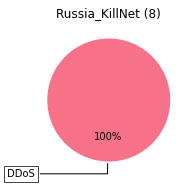

In [ ]:
getAttackedCountryCharts('Latvia')

### Lithuania

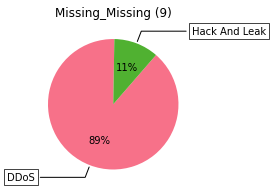

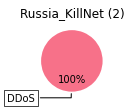

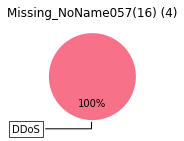

In [ ]:
getAttackedCountryCharts('Lithuania')

### Moldova

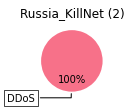

In [ ]:
getAttackedCountryCharts('Moldova')

### Montenegro

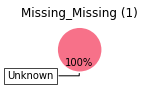

In [ ]:
getAttackedCountryCharts('Montenegro')

### Norway

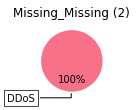

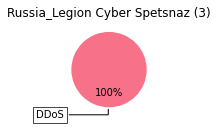

In [ ]:
getAttackedCountryCharts('Norway')

### Poland

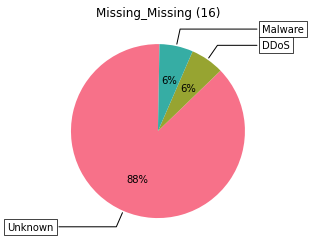

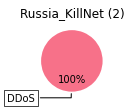

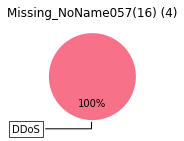

In [ ]:
getAttackedCountryCharts('Poland')

### Romania

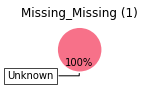

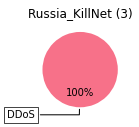

In [ ]:
getAttackedCountryCharts('Romania')

### Russia

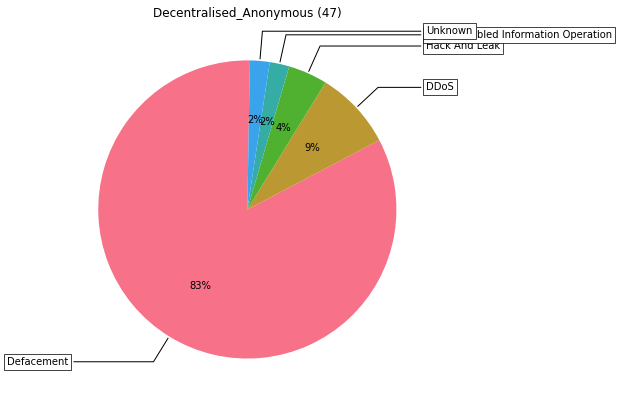

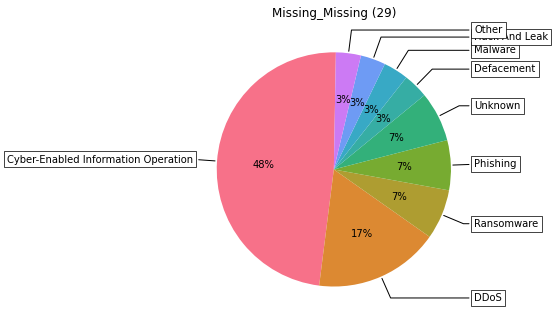

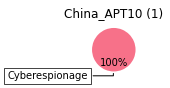

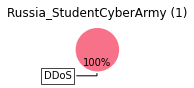

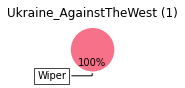

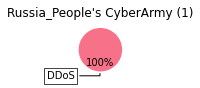

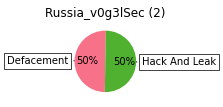

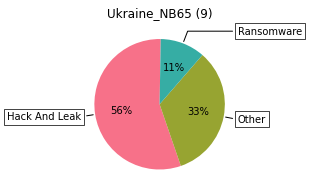

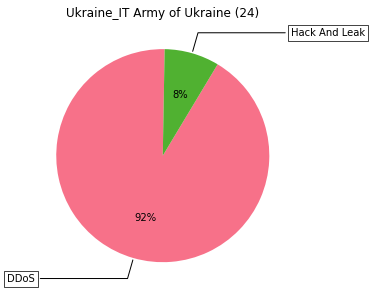

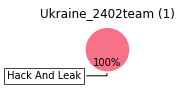

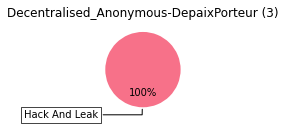

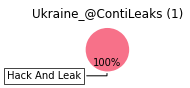

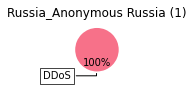

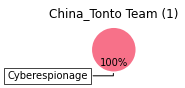

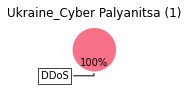

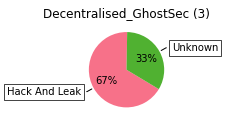

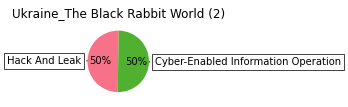

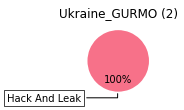

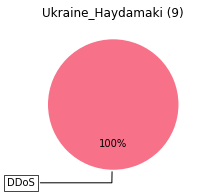

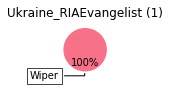

In [ ]:
getAttackedCountryCharts('Russian Federation')

### Slovakia

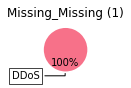

In [ ]:
getAttackedCountryCharts('Slovakia')

### Spain

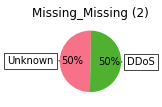

In [ ]:
getAttackedCountryCharts('Spain')

### Sweden

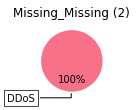

In [ ]:
getAttackedCountryCharts('Sweden')

### Switzerland

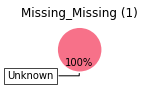

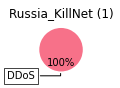

In [ ]:
getAttackedCountryCharts('Switzerland')

### Ukraine

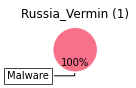

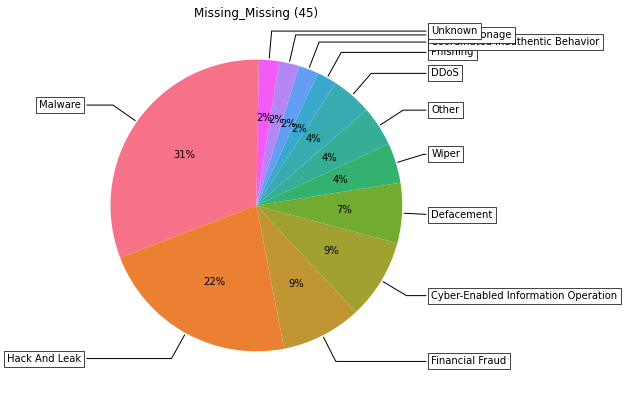

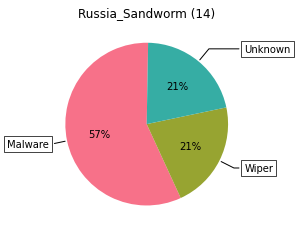

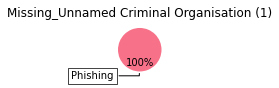

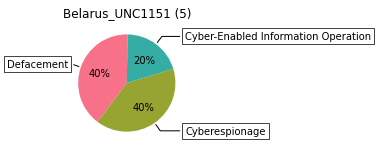

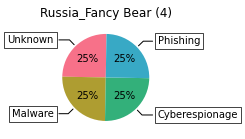

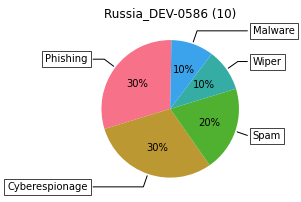

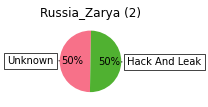

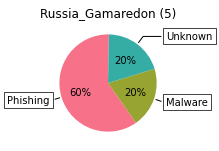

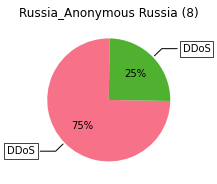

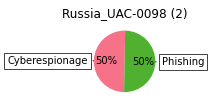

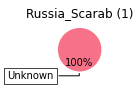

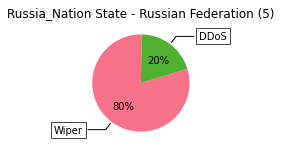

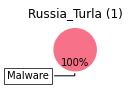

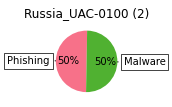

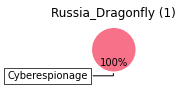

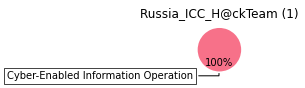

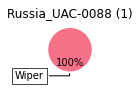

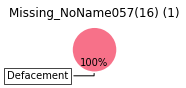

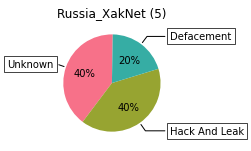

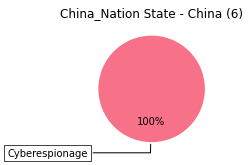

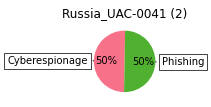

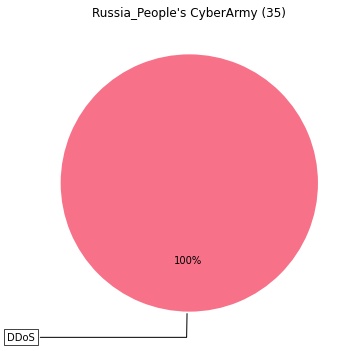

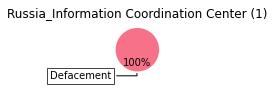

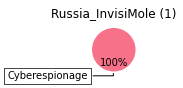

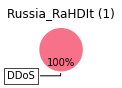

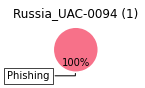

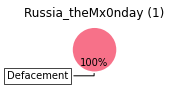

In [ ]:
getAttackedCountryCharts('Ukraine')

### UK

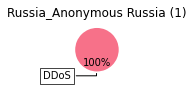

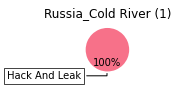

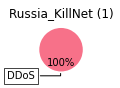

In [ ]:
getAttackedCountryCharts('United Kingdom')

### USA

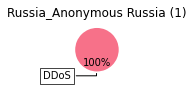

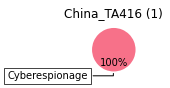

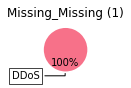

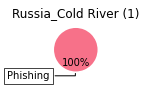

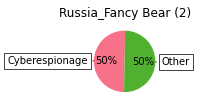

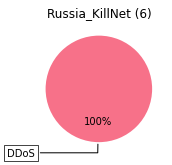

In [ ]:
getAttackedCountryCharts('United States')